Step 1: Import Libraries and Load Dataset

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [124]:
# Load the dataset
dataset= pd.read_csv(r'E:\Users\BHAVIKA\Desktop\dataset\EVIndia_Kaggle.csv')

Step 2: Explore the Dataset

In [125]:
# Display the first few rows of the dataset
print(dataset.head())

                     Car             Style               Range Transmission  \
0          Tata Nexon EV       Compact SUV  312 Km/Full Charge    Automatic   
1          Tata Tigor EV  Subcompact Sedan  306 Km/Full Charge    Automatic   
2      Tata Nexon EV Max       Compact SUV  437 Km/Full Charge    Automatic   
3               MG ZS EV       Compact SUV  419 Km/Full Charge    Automatic   
4  Hyundai Kona Electric       Compact SUV  452 Km/Full Charge    Automatic   

  VehicleType         PriceRange   Capacity BootSpace           BaseModel  \
0    Electric   ₹ 13.99 - 17.4 L  5 Seater      350 L                 XM    
1    Electric  ₹ 12.49 - 13.64 L  5 Seater      316 L                 XE    
2    Electric  ₹ 17.74 - 19.24 L  5 Seater      350 L     XZ Plus 3.3 kW    
3    Electric  ₹ 21.99 - 25.88 L  5 Seater      448 L             Excite    
4    Electric  ₹ 23.79 - 23.98 L  5 Seater         na  Premium Dual Tone    

              TopModel  
0    Dark XZ Plus LUX   
1   XZ Plus 

In [126]:
# Check for missing values
print(dataset.isnull().sum())

Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
dtype: int64


In [21]:
# Summary statistics
print(dataset.describe())

       Car_Audi E-Tron Car_Audi E-Tron GT Car_BMW iX Car_BYD E6  \
count               12                 12         12         12   
unique               2                  2          2          2   
top              False              False      False      False   
freq                11                 11         11         11   

       Car_Hyundai Kona Electric Car_Jaguar I-Pace Car_MG ZS EV  \
count                         12                12           12   
unique                         2                 2            2   
top                        False             False        False   
freq                          11                11           11   

       Car_Mercedes-Benz EQC Car_Porsche Taycan Car_Tata Nexon EV  ...  \
count                     12                 12                12  ...   
unique                     2                  2                 2  ...   
top                    False              False             False  ...   
freq                      11    

Step 3: Data Cleaning and Preprocessing

In [127]:
# Handle missing values using forward fill
dataset = dataset.ffill()

In [128]:
# Identify all non-numeric columns
non_numeric_columns = dataset.select_dtypes(exclude=[np.number]).columns.tolist()


In [129]:
# Convert all non-numeric columns to numerical using one-hot encoding
if non_numeric_columns:
    dataset = pd.get_dummies(dataset, columns=non_numeric_columns)


In [130]:
# Standardize the data (only numeric columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)


In [137]:
# Print the standardized data
#print(scaled_data)
# Verify the mean and standard deviation
mean = np.mean(scaled_data, axis=0)
std_dev = np.std(scaled_data, axis=0)

print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: [-3.70074342e-17  0.00000000e+00 -1.85037171e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.25185854e-18
 -2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.85037171e-17  0.00000000e+00
 -2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.70074342e-17  0.00000000e+00
  0.00000000e+00 -1.85037171e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -9.25185854e-18 -2.77555756e-17  0.00000000e+00
  0.00000000e+00 -9.25185854e-18 -3.70074342e-17  0.00000000e+00
 -1.85037171e-17 -2.77555756e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17  1.52655666e-16  0.00000000e+00
  8.32667268e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.70074342e-17  7.40148683e-17  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0

Data Visualization

Price Range of top ev cars

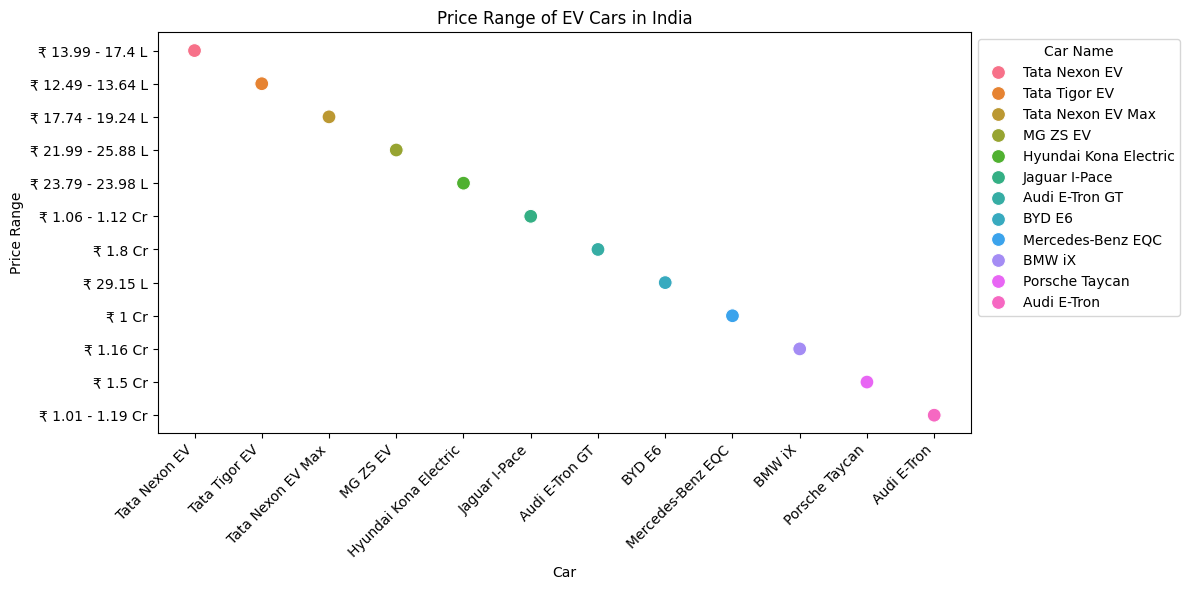

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Car', y='PriceRange', data=dataset, hue='Car', s=100)
plt.title('Price Range of EV Cars in India')
plt.xlabel('Car')
plt.ylabel('Price Range')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Name', bbox_to_anchor=(1, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()

Tata Nexon EV and Tata Tigor EV have the highest price range between 12.49 to 17.4 lakh.

Distance Covered in Single Charge for Top EV Cars

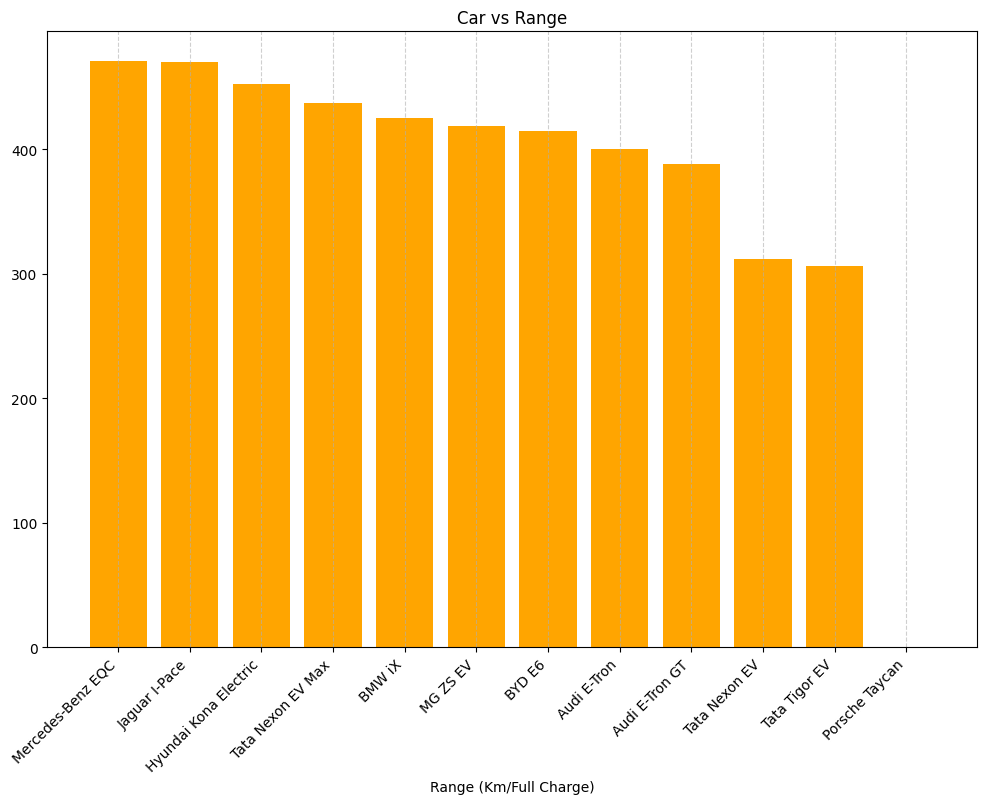

In [131]:
#visualization to compare cars vs range each car and there respective distance covered in each single charge

cars = ["Tata Nexon EV", "Tata Tigor EV", "Tata Nexon EV Max", "MG ZS EV", "Hyundai Kona Electric",
        "Jaguar I-Pace", "Audi E-Tron GT", "BYD E6", "Mercedes-Benz EQC", "BMW iX",
        "Porsche Taycan", "Audi E-Tron"]

ranges = ["312 Km/Full Charge", "306 Km/Full Charge", "437 Km/Full Charge", "419 Km/Full Charge",
          "452 Km/Full Charge", "470 Km/Full Charge", "388 Km/Full Charge", "415 Km/Full Charge",
          "471 Km/Full Charge", "425 Km/Full Charge", "na", "400 Km/Full Charge"]

# Convert the range values to numeric for sorting
numeric_ranges = [int(range_val.split(" ")[0]) if range_val != "na" else 0 for range_val in ranges]

# Sort data based on range
sorted_data = sorted(zip(cars, numeric_ranges), key=lambda x: x[1], reverse=True)

cars, numeric_ranges = zip(*sorted_data)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(cars, numeric_ranges, color='orange')
plt.xlabel('Range (Km/Full Charge)')
plt.xticks(rotation=45, ha='right')
plt.title('Car vs Range')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The distance covered in a single charge is the highest for the Mercedes-Benz EQC. It can travel 471 km per full charge.

Bar Chart
Number of Cars per Style

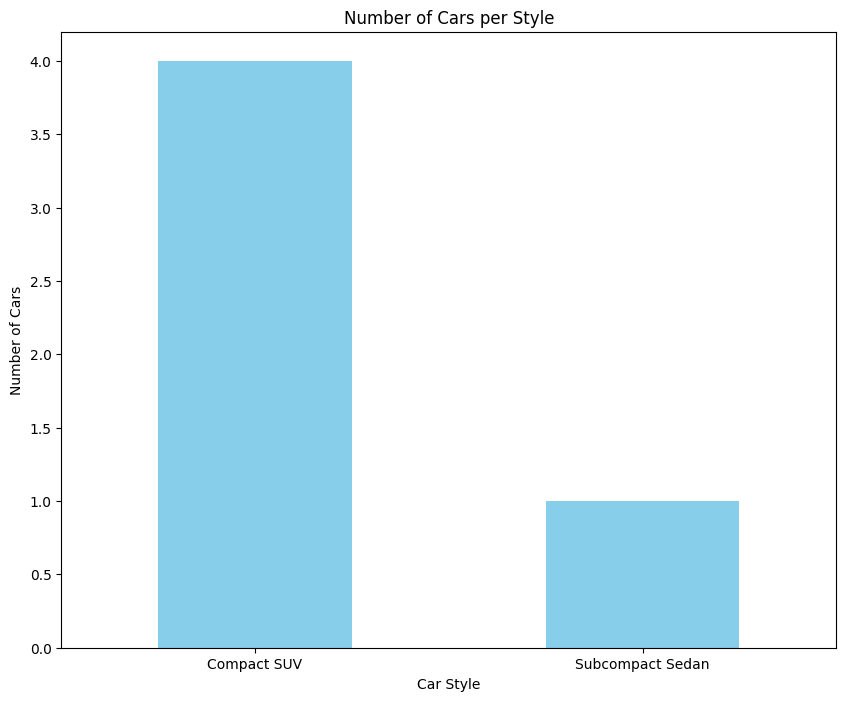

In [132]:
# Assuming df is the DataFrame containing the provided data
df = pd.DataFrame({
    'Car': ['Tata Nexon EV', 'Tata Tigor EV', 'Tata Nexon EV Max', 'MG ZS EV', 'Hyundai Kona Electric'],
    'Style': ['Compact SUV', 'Subcompact Sedan', 'Compact SUV', 'Compact SUV', 'Compact SUV'],
    'Range': ['312 Km/Full Charge', '306 Km/Full Charge', '437 Km/Full Charge', '419 Km/Full Charge', '452 Km/Full Charge'],
    'Transmission': ['Automatic', 'Automatic', 'Automatic', 'Automatic', 'Automatic'],
    'VehicleType': ['Electric', 'Electric', 'Electric', 'Electric', 'Electric'],
    'PriceRange': ['₹ 13.99 - 17.4 L', '₹ 12.49 - 13.64 L', '₹ 17.74 - 19.24 L', '₹ 21.99 - 25.88 L', '₹ 23.79 - 23.98 L'],
    'Capacity': ['5 Seater', '5 Seater', '5 Seater', '5 Seater', '5 Seater'],
    'BootSpace': ['350 L', '316 L', '350 L', '448 L', 'na'],
    'BaseModel': ['XM', 'XE', 'XZ Plus 3.3 kW', 'Excite', 'Premium Dual Tone'],
    'TopModel': ['Dark XZ Plus LUX', 'XZ Plus Dual Tone', 'XZ Plus Lux 7.2 kW', 'Exclusive', 'HSE']
})

style_counts = df['Style'].value_counts()
style_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Car Style')
plt.ylabel('Number of Cars')
plt.title('Number of Cars per Style')
plt.xticks(rotation=0)
plt.show()

This shows that Compact SUVs are the most popular style in the given electric vehicle data.

Data Segmentation

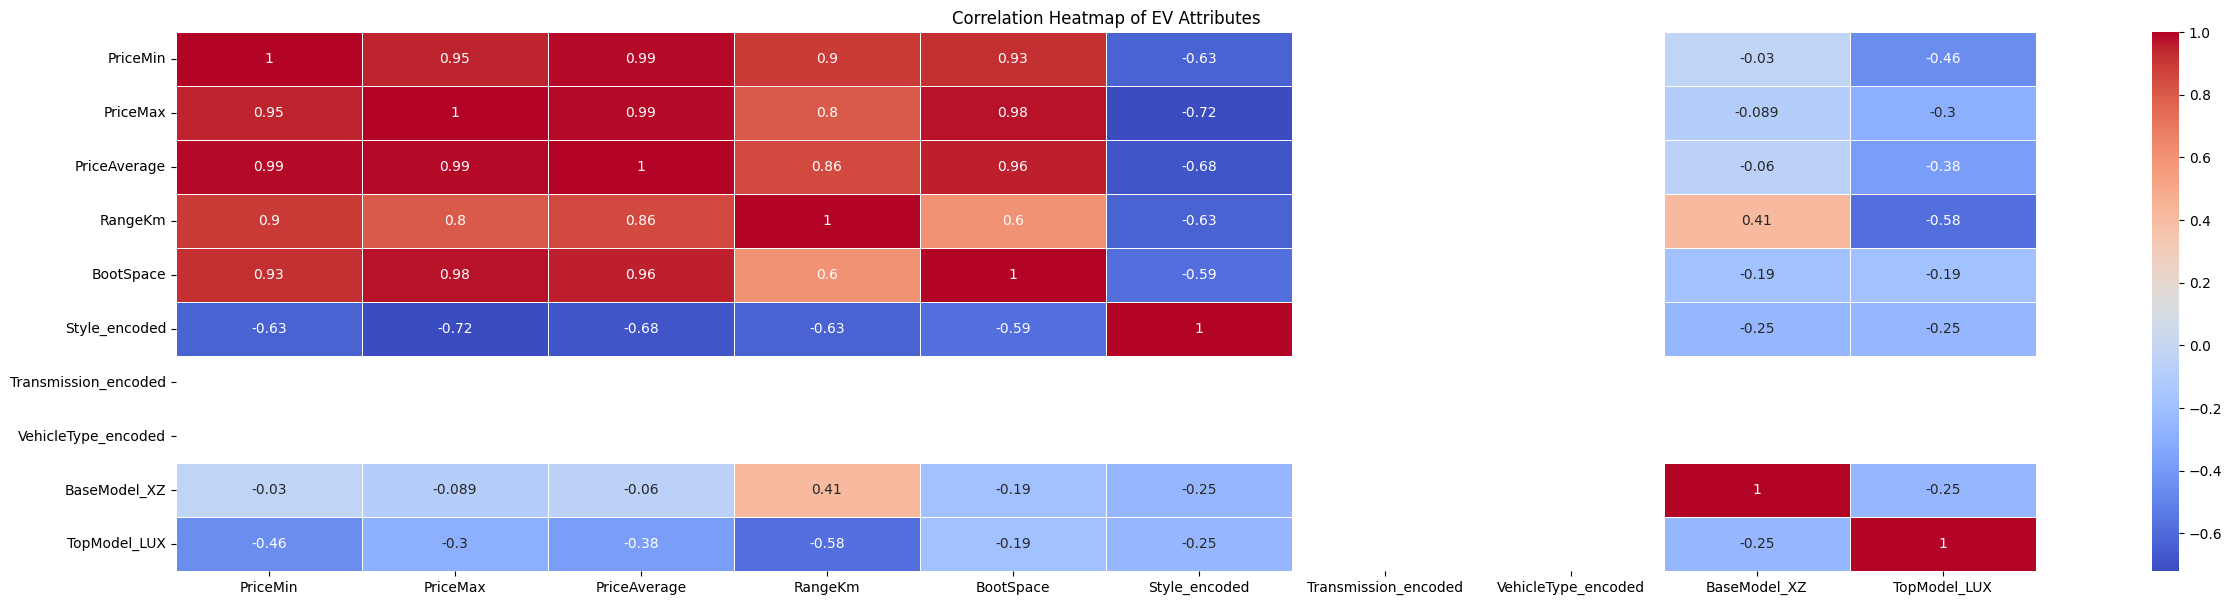

In [135]:
# Plot the heatmap
plt.figure(figsize=(30, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of EV Attributes')
plt.show()

Step 4: Determine the Optimal Number of Clusters python


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

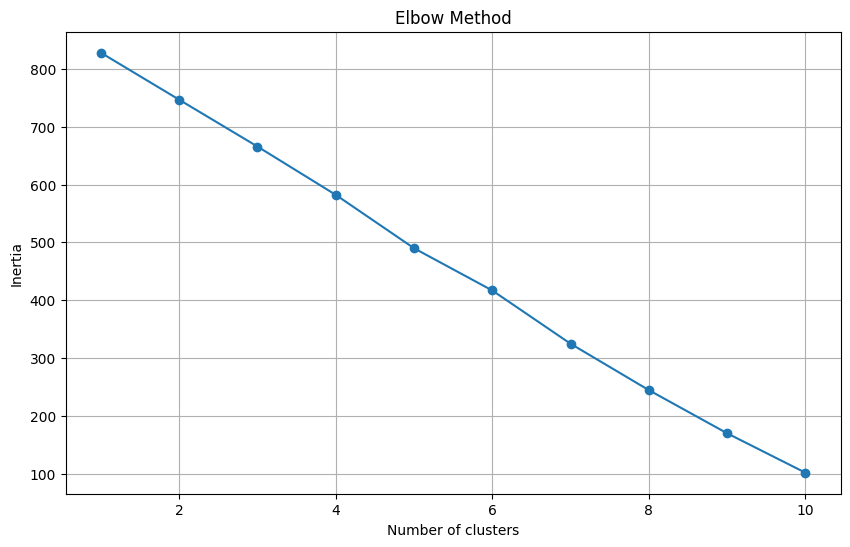

In [138]:
# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Step 5: Apply KMeans Clustering

In [134]:
# Assuming the optimal number of clusters is 3 (based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(scaled_data)
# Add cluster labels to the original dataset
dataset['Cluster'] = clusters

Step 6: Visualize the Clusters
Using PCA for dimensionality reduction:

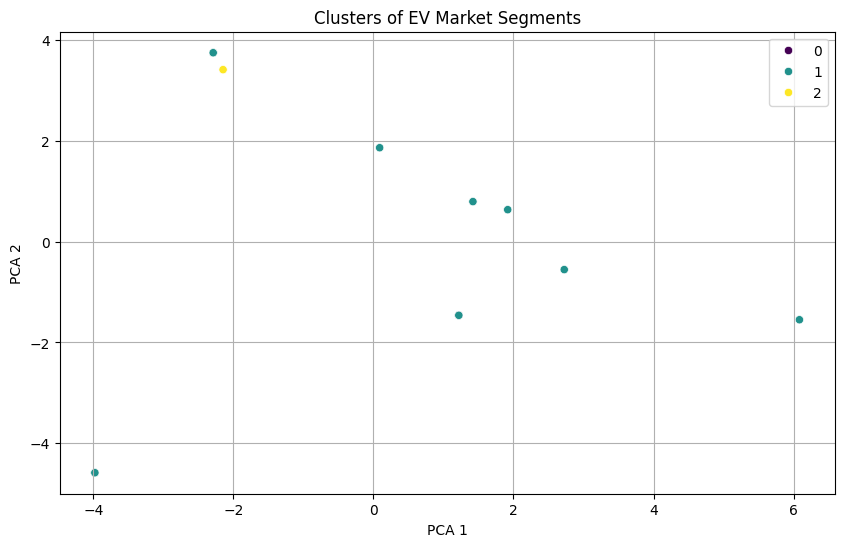

In [136]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of EV Market Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

Step 7: Analyze the Segments
Examine the characteristics of each cluster to understand the market segments:

In [146]:
# Summary statistics for each cluster
for cluster in range(3):
    print(f'Cluster {cluster}')
    print(dataset[dataset['Cluster'] == cluster].describe())
    print('\n')

Cluster 0
       Cluster
count      9.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0


Cluster 1
       Cluster
count      1.0
mean       1.0
std        NaN
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0


Cluster 2
       Cluster
count      2.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0




Summary statistics describe the attributes and characteristics of vehicles grouped within each cluster, aiding in market segmentation insights.

In [11]:
# Load the dataset 2
dt2= pd.read_csv(r'E:\Users\BHAVIKA\Desktop\dataset\demographicData.csv')

In [ ]:
Explor the data

In [47]:
dt2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster,PC1,PC2
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0,-2.047603,0.071780
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,2,-0.504295,-0.205467
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,1,1.055572,-0.921293
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,2,0.389423,-0.677164
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,2,-0.537413,0.671693


In [48]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               99 non-null     int64  
 1   Profession        99 non-null     object 
 2   Marrital Status   99 non-null     object 
 3   Education         99 non-null     object 
 4   No of Dependents  99 non-null     int64  
 5   Personal loan     99 non-null     object 
 6   House Loan        99 non-null     object 
 7   Wife Working      99 non-null     object 
 8   Salary            99 non-null     int64  
 9   Wife Salary       99 non-null     int64  
 10  Total Salary      99 non-null     int64  
 11  Make              99 non-null     object 
 12  Price             99 non-null     int64  
 13  Cluster           99 non-null     int32  
 14  PC1               99 non-null     float64
 15  PC2               99 non-null     float64
dtypes: float64(2), int32(1), int64(6), object(7)
m

In [49]:
dt2.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Cluster,PC1,PC2
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06,1.474747,-6.728624e-17,4.261462e-17
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05,1.033554,1.293578e+00,5.891208e-01
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05,0.000000,-2.161388e+00,-1.585313e+00
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05,0.000000,-9.025414e-01,-3.109717e-01
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06,2.000000,-2.767257e-01,2.825294e-02
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06,2.000000,9.128090e-01,3.665319e-01
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06,3.000000,3.734598e+00,1.759862e+00


In [46]:
dt2.shape

(99, 16)

In [50]:
#data cleaning
dt2 = dt2.dropna()

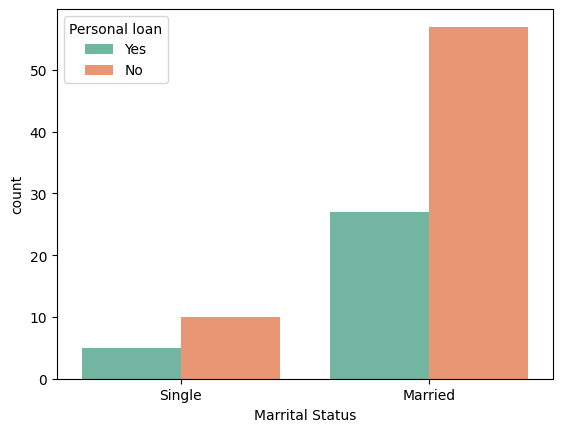

In [53]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Personal loan',  data = dt2, palette = 'Set2')
plt.show()

More married people have a personal loan compared to singles.

In [56]:
#How many percentage of person are married
import math
a =(dt2['Marrital Status'].value_counts()['Married'])/((dt2['Marrital Status'].value_counts()['Married'])+(dt2['Marrital Status'].value_counts()['Single']))*100
print(math.floor(a),'%')

84 %


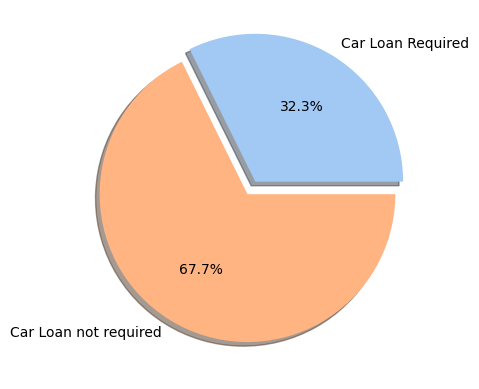

In [59]:
dt2.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
dt2.rename(columns={'Price':'EV_Price'},inplace=True)

labels = ['Car Loan Required','Car Loan not required']
Loan_status = [dt2.query('Car_Loan == "Yes"').Car_Loan.count(),dt2.query('Car_Loan == "No"').Car_Loan.count()]

explode = [0.1, 0]
palette_color = sns.color_palette('pastel')

plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')

plt.show()

From this graph, 67.7% of people do not require a car loan, while 32.3% do require a car loan.

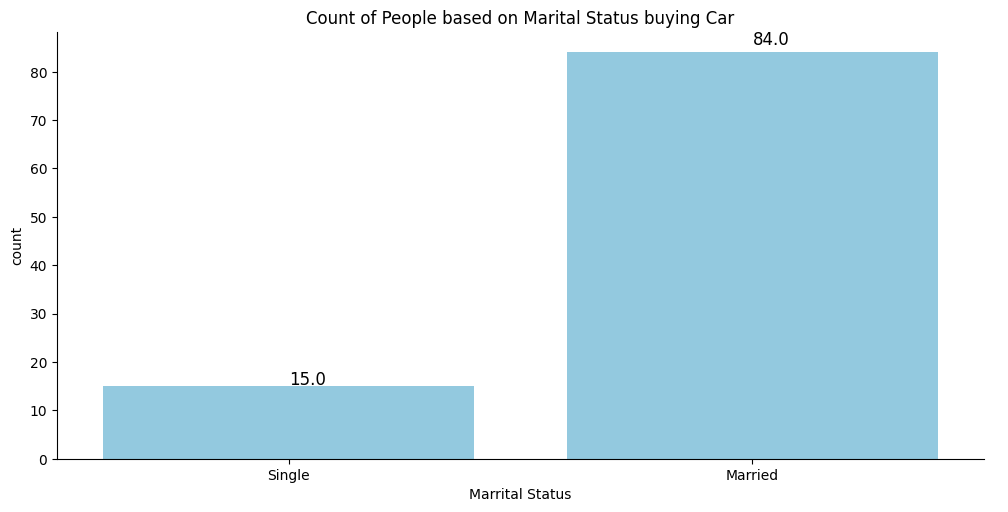

In [62]:
g = sns.catplot(x = "Marrital Status", data=dt2, aspect=2, kind="count", color='skyblue')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Marital Status buying Car', color='black')
plt.show()

In [ ]:
Comparing marital status, more married individuals are buying cars compared to singles.

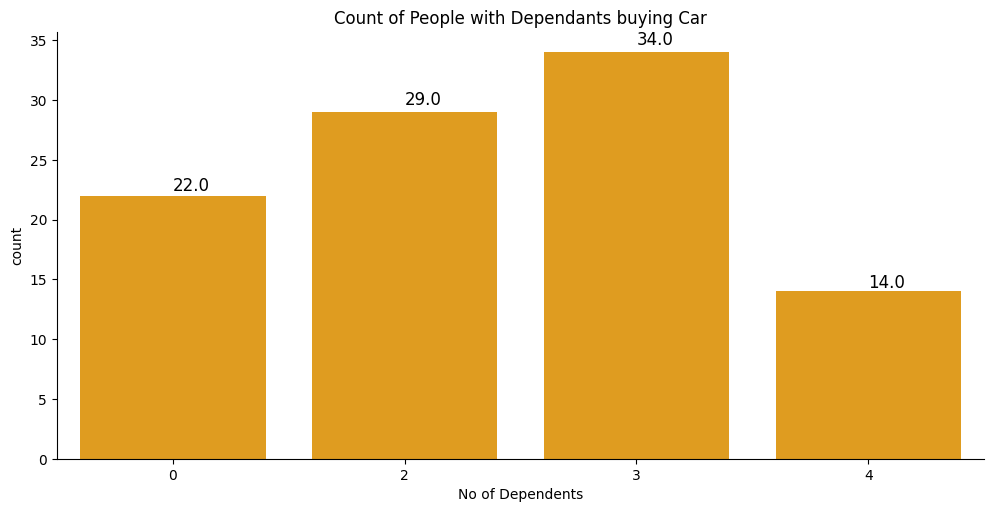

In [66]:
g = sns.catplot(x = "No of Dependents", data=dt2, aspect=2, kind="count", color='orange')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People with Dependants buying Car', color='black')
plt.show()

The bar chart shows that the highest number of people buying a car is among those with 3 dependents (34 people), while the lowest is among those with 4 dependents (14 people). Additionally, 29 people with 2 dependents and 22 people with no dependents are buying a car.

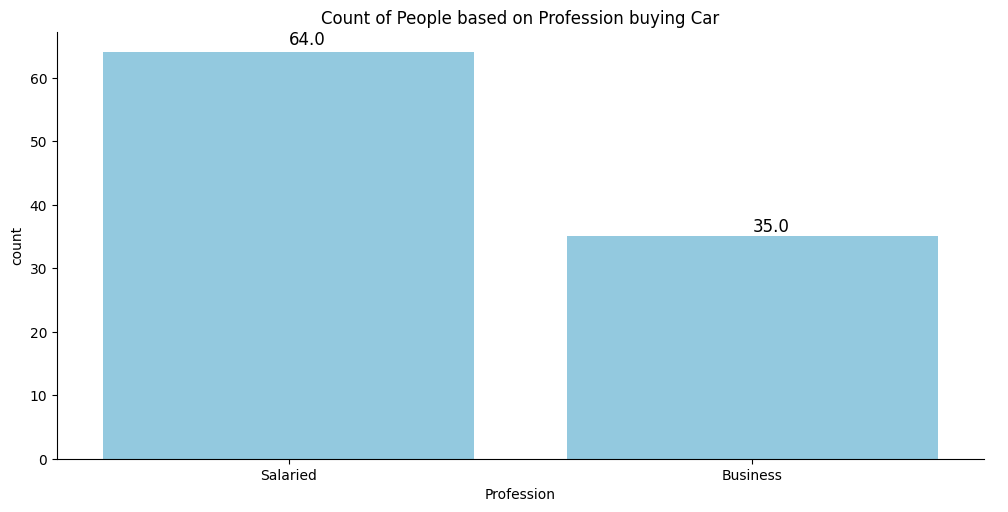

In [71]:
g = sns.catplot(x = "Profession", data=dt2, aspect=2, kind="count", color='skyblue')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Profession buying Car', color='black')
plt.show()

In [ ]:
The bar chart indicates that 64 salaried individuals are buying a car compared to 35 business individuals.

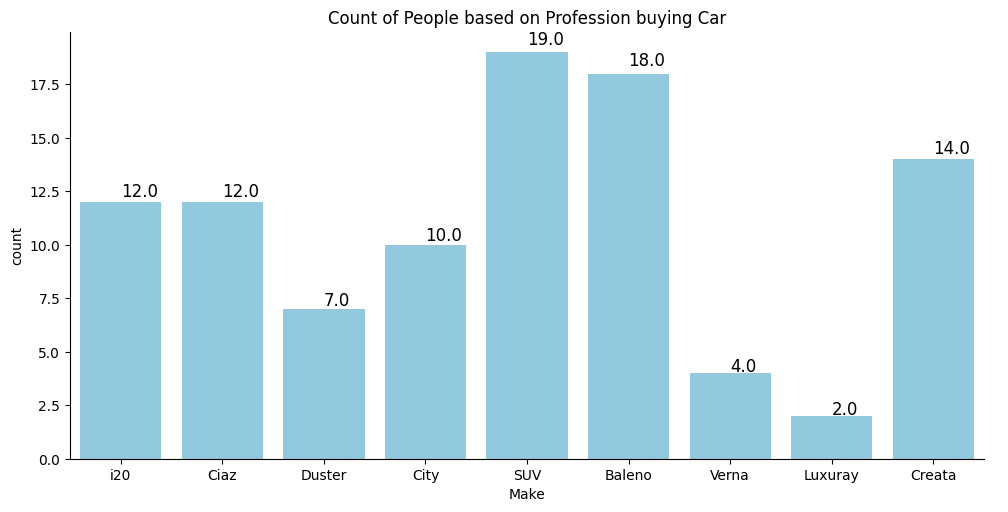

In [94]:
g = sns.catplot(x = "Make", data=dt2, aspect=2, kind="count", color='skyblue')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() * 1.02,
            format(p.get_height()),
            color='black', rotation='horizontal', size='large')
plt.title('Count of People based on Profession buying Car', color='black')
plt.show()

The bar chart shows the count of people buying different car makes. SUVs have the highest count at 19, followed by Baleno (18), Creta (14), i20 and Ciaz (both 12), City (10), Duster (7), Verna (4), and Luxury (2).

In [73]:
SalaryGroup={}
length=dt2.shape[0]
SalaryGroup['0-5lakh']=round(dt2[(dt2['Total Salary']>=100000)&(dt2['Total Salary']<500000)].shape[0]*100/length,2)
SalaryGroup['5-15lakh']=round(dt2[(dt2['Total Salary']>=500000)&(dt2['Total Salary']<1500000)].shape[0]*100/length,2)
SalaryGroup['15-25lakh']=round(dt2[(dt2['Total Salary']>=1500000)&(dt2['Total Salary']<2500000)].shape[0]*100/length,2)
SalaryGroup['25-35lakh']=round(dt2[(dt2['Total Salary']>=2500000)&(dt2['Total Salary']<3500000)].shape[0]*100/length,2)
SalaryGroup['35-45lakh']=round(dt2[(dt2['Total Salary']>=3500000)&(dt2['Total Salary']<4500000)].shape[0]*100/length,2)
SalaryGroup['45-55lakh']=round(dt2[(dt2['Total Salary']>=4500000)&(dt2['Total Salary']<5500000)].shape[0]*100/length,2)

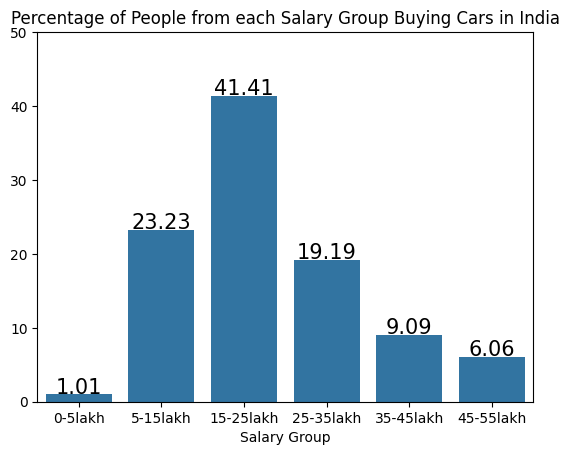

In [78]:
fig,ax=plt.subplots()
plots=sns.barplot(x = list(SalaryGroup.keys()), y = list(SalaryGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 5),
                   textcoords='offset points')
ax.set_ylim(0,50)
plt.title('Percentage of People from each Salary Group Buying Cars in India', color='black')
plt.xlabel('Salary Group', color='black',)
plt.show()

The highest percentage of people from the 15-25 lakh salary group buying cars in India is 41.41%.

In [80]:
WomenSalaryGroup={}
length=dt2.shape[0]
WomenSalaryGroup['Salaried'] = round(dt2[(dt2['Wife Salary']>0)].shape[0]*100/length,2)
WomenSalaryGroup['Not Salaried'] = round(dt2[(dt2['Wife Salary'] == 0)].shape[0]*100/length,2)

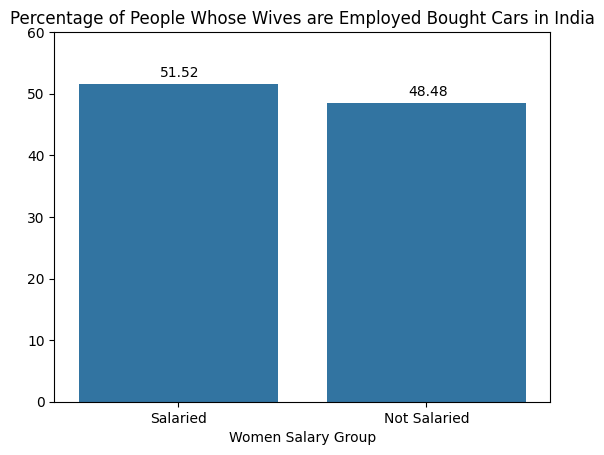

In [81]:
fig,ax=plt.subplots()
plots=sns.barplot(x=list(WomenSalaryGroup.keys()),y=list(WomenSalaryGroup.values()))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(1, 8),
                   textcoords='offset points')
ax.set_ylim(0,60)
plt.title('Percentage of People Whose Wives are Employed Bought Cars in India')
plt.xlabel('Women Salary Group')
plt.show()

In India, 51.52% of car buyers have salaried wives, while 48.48% have non-salaried wives.

In [51]:
# Identify numeric features
numeric_features = dt2.select_dtypes(include=['int64', 'float64']).columns
print("Numeric features:", numeric_features)


Numeric features: Index(['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary',
       'Price', 'PC1', 'PC2'],
      dtype='object')


In [20]:
#feature selection
features = dt2[['Age', 'Salary']]

In [21]:
#standardise the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Apply K-Means clustering

In [82]:
dt2['Wife Working'].value_counts()

Wife Working
Yes    52
No     46
m       1
Name: count, dtype: int64

In [84]:
dt2.drop(dt2[dt2['Wife Working'] == 'm'].index, inplace=True)
dt2.shape

(98, 16)

In [87]:
numerical =  dt2.select_dtypes(include=['float64', 'int64'])

label_encoder = preprocessing.LabelEncoder()
categorical = dt2.select_dtypes(include = ["object"])
for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

X = pd.concat([numerical, categorical], axis=1)

In [88]:
X.dtypes

Age                   int64
No of Dependents      int64
Salary                int64
Wife Salary           int64
Total Salary          int64
EV_Price              int64
PC1                 float64
PC2                 float64
Profession            int32
Marrital Status       int32
Education             int32
Car_Loan              int32
House Loan            int32
Wife Working          int32
Make                  int32
dtype: object

In [89]:
pca_data = preprocessing.scale(X)
pca = PCA(n_components=12)
pc = pca.fit_transform(X)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12']
pf = pd.DataFrame(data=pc,columns=names)

In [90]:
pca.explained_variance_ratio_

array([8.32790708e-01, 1.27233463e-01, 3.99758288e-02, 1.10525217e-11,
       3.17490018e-12, 5.70383641e-13, 1.26308848e-13, 1.25461715e-13,
       8.59302962e-14, 4.84410508e-14, 3.05388453e-14, 1.53510652e-14])

In [110]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')


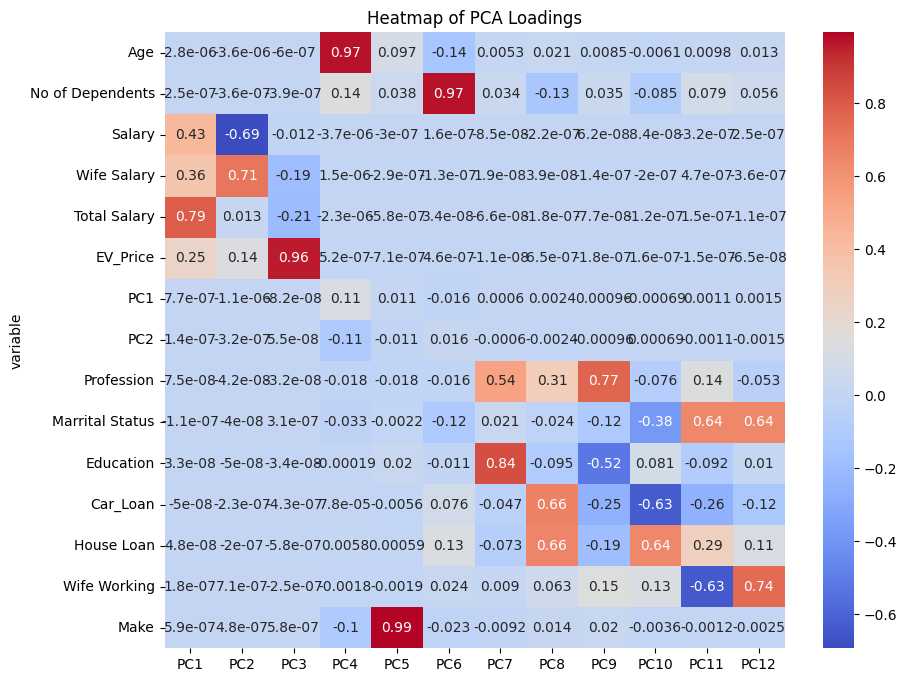

In [112]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('Heatmap of PCA Loadings')
plt.show()

This graph shows heatmap of PCA Loadings.

In [113]:
wcss=[]
for i in range(1,11):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

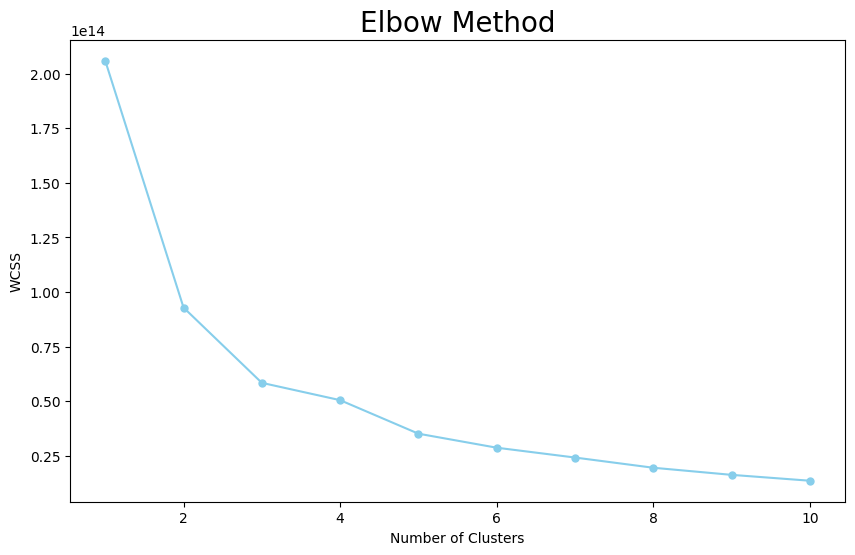

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='skyblue', linestyle='solid', marker='o',
          markersize=5)
plt.title('Elbow Method', size=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method graph suggests that the optimal number of clusters for this dataset is 3, as the Within-Cluster Sum of Squares (WCSS) decreases significantly up to 3 clusters and then levels off.


In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
dt2['Cluster'] = kmeans.fit_predict(scaled_features)

In [38]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
dt2['PC1'] = principal_components[:, 0]
dt2['PC2'] = principal_components[:, 1]

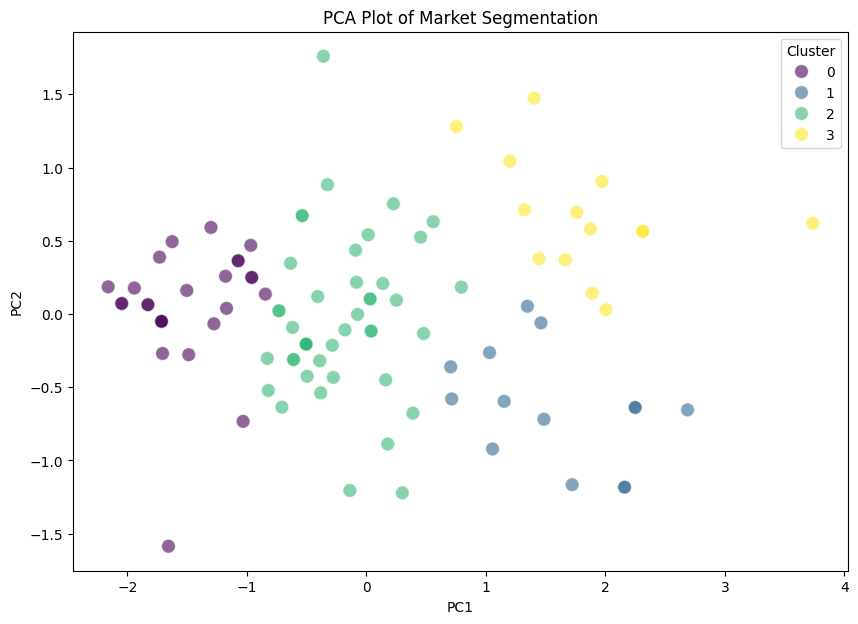

In [40]:
# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=dt2, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.6)
plt.title('PCA Plot of Market Segmentation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

This graph shows PCA Plot of Market Segmentation.

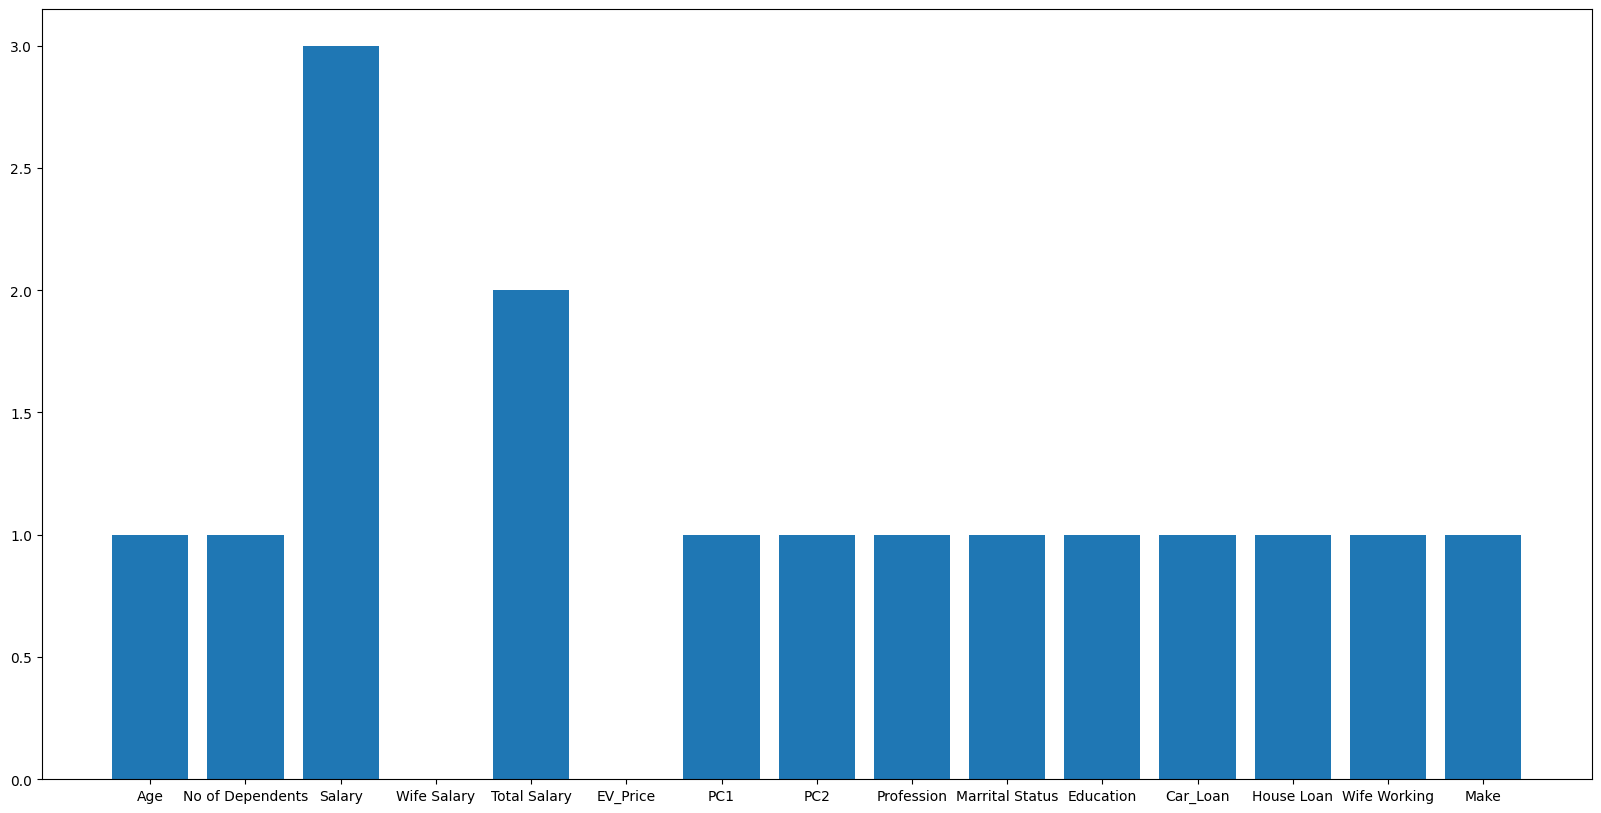

In [116]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc
from sklearn.metrics import pairwise_distances
clust2 = AgglomerativeClustering(n_clusters = 4).fit_predict(pairwise_distances(X.transpose()))
plt.figure(figsize = (20,10))
plt.bar(X.columns,clust2)
plt.show()

The bar chart shows that "Salary" and "Total Salary" have the highest values, with "Salary" being the highest. "Age" and "Number of Dependents" have moderate values, while the rest of the attributes have lower values.

In [32]:
#Analyze the Segments: Look at the characteristics of each cluster.
cluster_summary = dt2.groupby('Cluster')[numeric_features].mean()
print(cluster_summary)

               Age  No of Dependents        Salary    Wife Salary  \
Cluster                                                             
0        29.576923          1.038462  1.057692e+06  246153.846154   
1        46.071429          3.142857  2.185714e+06  664285.714286   
2        35.577778          2.422222  1.620000e+06  571111.111111   
3        41.428571          2.571429  2.921429e+06  821428.571429   

         Total Salary         Price  
Cluster                              
0        1.303846e+06  9.426923e+05  
1        2.850000e+06  1.364286e+06  
2        2.191111e+06  1.182222e+06  
3        3.742857e+06  1.528571e+06  
